In [1]:
from PIL import Image
import torch
import torch.nn as nn
from torchvision import models, transforms
from torchvision.models import SqueezeNet1_1_Weights, ResNet18_Weights, DenseNet161_Weights
from torch.autograd import Variable
from torch.nn import functional as F
from torch.utils.data import DataLoader as tf_dataloader
import numpy as np
import cv2
import json
import torchvision
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([
    #transforms.Resize(256),
    #transforms.CenterCrop(224),
    transforms.ToTensor(), 
    transforms.Normalize((0.5,), (0.5,))
])

batch_size = 1

# Train data
mnist = torchvision.datasets.MNIST(
    root="./data", train=True, download=True, transform=transform
)
dataloader = tf_dataloader(
    mnist, batch_size=batch_size, shuffle=True, num_workers=2
)

In [3]:
# functions to show an image
def imshow(img):
    plt.figure(figsize=(2, 2))
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis("off")
    plt.show()

tensor([7])


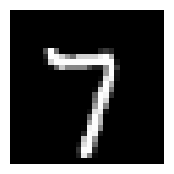

In [4]:
# get some random training images
dataiter = iter(dataloader)
images, labels = next(dataiter)
print(labels)
imshow(torchvision.utils.make_grid(images))

In [5]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.layer1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.layer2 = nn.MaxPool2d(kernel_size=2, stride=3)
        
        self.layer3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.layer4 = nn.MaxPool2d(kernel_size=2, stride=3)
        
        self.layer5 = nn.Flatten()
        self.drop1 = nn.Dropout(p=0.2)
        
        self.fc1 = nn.Linear(in_features=288, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=10)

    def forward(self, x):
        
        self.x1 = self.layer1(x)
        self.x2 = F.relu(self.layer2(self.x1))
        
        self.x3 = self.layer3(self.x2)
        self.x4 = F.relu(self.layer4(self.x3))
        
        self.x5 = self.layer5(self.x4)
        self.x6 = self.drop1(self.x5)
        
        self.x7 = F.relu(self.fc1(self.x6))
        self.x8 = F.softmax(self.fc2(self.x7), dim = 1)
            
        return self.x8, self.x4

model = Net()

In [7]:
# Evaluating the trained model on test data
model.load_state_dict(torch.load('best_model_mnist.pth'))
model.eval()  # Set model to evaluation mode

Net(
  (layer1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (layer2): MaxPool2d(kernel_size=2, stride=3, padding=0, dilation=1, ceil_mode=False)
  (layer3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (layer4): MaxPool2d(kernel_size=2, stride=3, padding=0, dilation=1, ceil_mode=False)
  (layer5): Flatten(start_dim=1, end_dim=-1)
  (drop1): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=288, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [9]:
model = Net()
model.eval()  # Eval mode


# Pasamos la imagen por el modelo.
output, feature_maps = model(images)


In [12]:
feature_maps.shape

torch.Size([1, 32, 3, 3])

In [13]:
X

NameError: name 'X' is not defined